<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/8_3_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1.

Для выполнения задачи будет использован **csv файл “vgsale_1**”, содержащий данные о видеоиграх, выпущенных с 1980 по 2020 гг. Каждое из наблюдений в файле имеет 10 характеристик:

- **Name** – название игры,
- **Platform** – игровая платформа (PC, PSP, X360 и др.),
- **Year** – год выпуска игры,
- **Genre** – жанр игры,
- **Publisher** – издатель игры,
- **NA_Sales –** продажи в Северной Америке (в миллионах),
- **EU_Sales** – продажи в Европе (в миллионах),
- **JP_Sales** – продажи в Японии (в миллионах),
- **Other_Sales** – продажи в остальных странах мира (в миллионах),
- **Global_Sales** – объем продаж по всему миру.


Загрузите файл **«vgsales_1.csv»** в объект **==DataFrame==**, рассчитайте необходимые показатели и визуализируйте информацию, используя функции любой библиотеки для визуализации данных. **Задание:**

1. **==Ответь==** на вопрос: игры каких жанров были наиболее популярны до 2000 года, а какие после?
2. **==Оцени==** популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов **==используй==** столбчатые диаграммы.


**Примечание.** Одна и та же игра может встречаться в выборке несколько раз, т.к. она может быть выпущена на нескольких платформах.

1. **==Отобрази==** на графике общее число видеоигр, выпущенных в каждом году.
2. **==Определи==** трех издателей, выпустивших наибольшее количество видеоигр. **==Изобрази==** количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).
3. **==Отобрази==** на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии (также для построения корректных диаграмм используйте столбец “Other Sales”) от объема продаж по всему миру.

In [ ]:
%matplotlib inline

In [1]:
# Загрузим все необходимые библиотеки
import os

import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots

import ast
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../assets/vgsale 1.csv")

df = df.drop(df[df["Year"].isnull()].index)
df['Year'] = df['Year'].astype(int)

In [139]:
# По количеству вышедших игр
genre_counts_released = df.groupby(["Year", "Genre"]).size().reset_index(name="Counts")
genre_counts_released["Total"] = genre_counts_released.groupby("Year")["Counts"].transform("sum")
genre_counts_released["Percentage"] = genre_counts_released["Counts"] / genre_counts_released["Total"] * 100

In [142]:
# По количеству проданных игр
genre_counts_sold = df.groupby(["Year", "Genre"])['Global_Sales'].sum().reset_index()
genre_counts_sold["Total"] = genre_counts_sold.groupby("Year")["Global_Sales"].transform("sum")
genre_counts_sold["Percentage"] = genre_counts_sold["Global_Sales"] / genre_counts_sold["Total"] * 100

In [141]:
genre_counts.head()
# type(genre_counts)

,Year,Genre,Global_Sales,Total,Percentage
0,1980,Action,0.34,11.38,2.987698
1,1980,Fighting,0.77,11.38,6.766257
2,1980,Misc,2.71,11.38,23.813708
3,1980,Shooter,7.07,11.38,62.126538
4,1980,Sports,0.49,11.38,4.305800


In [130]:
_genre_counts = (
    genre_counts.groupby(["Year"] + ["Genre"])["Percentage"]
    .sum()
    .unstack(fill_value=0.0)
)

_genre_counts.head()
# _genre_counts.info()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,11.111111,0.000000,11.111111,44.444444,0.000000,0.000000,0.000000,0.0,22.222222,0.000000,11.111111,0.0
1981,54.347826,0.000000,0.000000,0.000000,6.521739,4.347826,2.173913,0.0,21.739130,2.173913,8.695652,0.0
1982,50.000000,0.000000,0.000000,2.777778,13.888889,8.333333,5.555556,0.0,13.888889,0.000000,5.555556,0.0
1983,41.176471,5.882353,0.000000,5.882353,29.411765,5.882353,0.000000,0.0,5.882353,0.000000,5.882353,0.0
1984,7.142857,0.000000,0.000000,7.142857,7.142857,21.428571,21.428571,0.0,21.428571,0.000000,14.285714,0.0


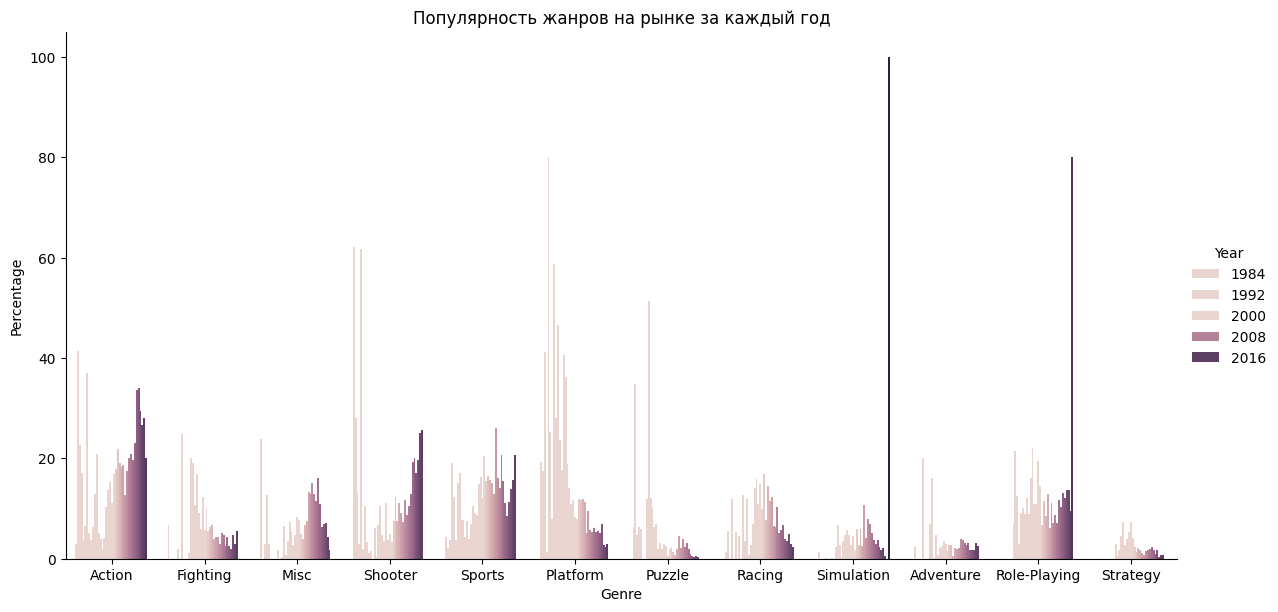

In [106]:
sns.catplot(
    x="Genre",
    y="Percentage",
    hue="Year",
    data=genre_counts,
    kind="bar",
    height=6,
    aspect=2,
    hue_norm=(2000,)

)
plt.title("Популярность жанров на рынке за каждый год")
plt.show()

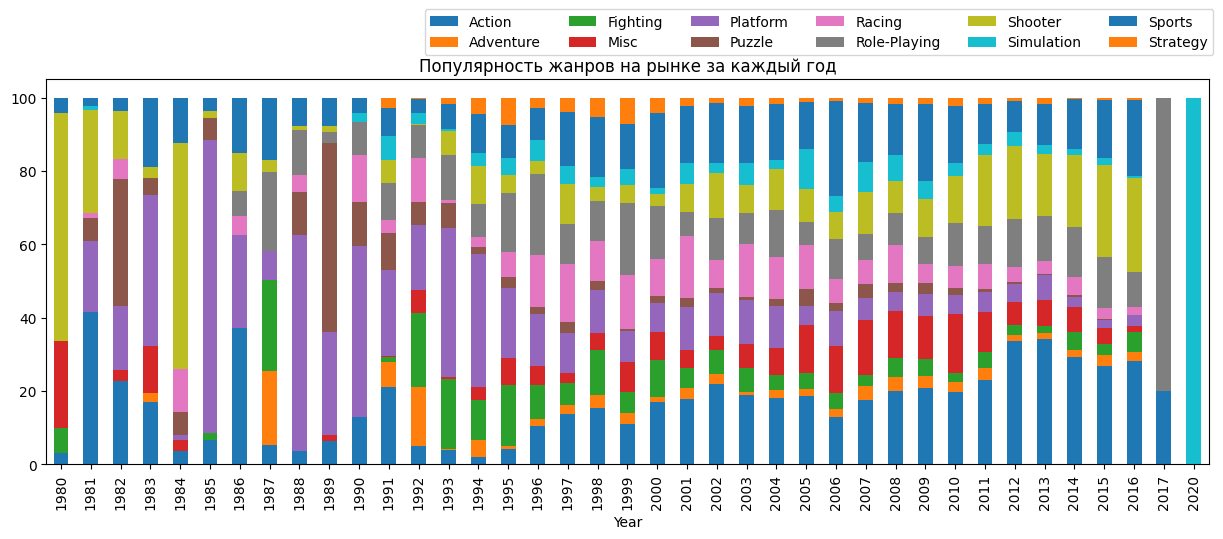

In [107]:
_genre_counts.plot(
    kind="bar",
    stacked="True",
    figsize=(15, 5),
    title="Популярность жанров на рынке за каждый год",
)

plt.legend(bbox_to_anchor=(1.01, 1.2), ncol=6)

plt.show()

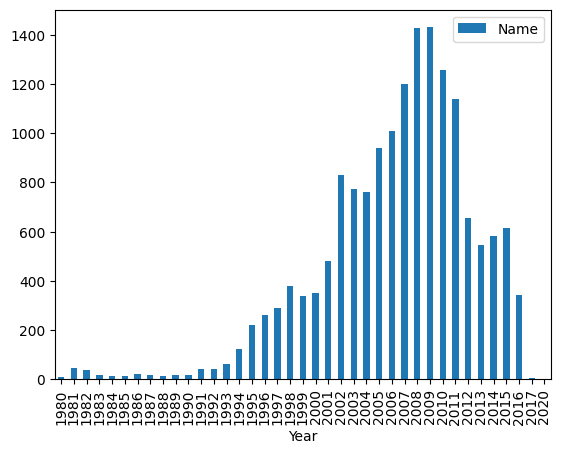

In [166]:
# **==Отобрази==** на графике общее число видеоигр, выпущенных в каждом году.
_temp_df = df.groupby(['Year'])['Name'].count().reset_index().plot(kind='bar', x='Year')
plt.show()

In [165]:
# **==Определи==** трех издателей, выпустивших наибольшее количество видеоигр.
_temp_df = df.groupby(["Publisher"])['Name'].nunique().sort_values(ascending=False)
print(_temp_df.head(3))

Publisher
Namco Bandai Games              774
Nintendo                        662
Konami Digital Entertainment    634
Name: Name, dtype: int64


#  **==Изобрази==** количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).

# Задача 2.

Для выполнения работы будет использован csv файл “IQ_countries”, содержащий данные о среднем значении IQ по странам мира. Каждое из наблюдений в файле имеет следующие характеристики:

- **Rank** – место в рейтинге
- **Country** – название страны
- **Average IQ** – средний показатель IQ
- **Continent –** название континента
- **Literacy Rate** – коэффициент грамотности
- **Nobel Prices** – количество нобелевских премий
- **Human Development Index** – индекс человеческого развития
- **Mean years of schooling** – среднее количество лет школы
- **Gross National Income** – показатель “валовой национальный доход”
- **Population** – численность населения.

Задание: **==проведи==** разведочный анализ данных, **==выяви==** необычные взаимосвязи между значениями столбцов таблицы, **==выполни==** визуализацию, **==сделай==** выводы.

Файл “IQ_countries.csv“ можно скачать по ссылке:

# Задача 3.

Для выполнения работы будет использован csv файл “**shopping_habits**”, содержащий данные о различных покупках, которые совершаются покупателями в разных штатах США. Каждое из наблюдений в файле имеет следующие характеристики:

- **Customer ID** – порядковый номер строки в таблице
- **Age** – возраст покупателя
- **Gender** – пол покупателя
- **Item Purchased** – приобретенный товар
- **Category** - категория
- **Purchase Amount (USD)** – сумма покупки (в долларах)
- **Location** – локация покупки
- **Size** – размер (одежды)
- **Color** – цвет
- **Season** – время года совершения покупки
- **Review Rating** – полученный в отзыве рейтинг
- **Subscription Status** – статус подписки покупателя
- **Shipping Type** – тип доставки
- **Discount Applied** – применена ли скидка
- **Promo Code Used** – применен ли промокод
- **Previous Purchases –** были ли у данного покупателя предыдущие покупки
- **Payment Method –** способ оплаты
- **Frequency of Purchases** – частота покупок.

Задание: ==**проведи**== разведочный анализ данных, **==выяви==** обычные взаимосвязи между значениями столбцов таблицы, **==выполни==** визуализацию, **==сделай==** выводы.

Файл “shopping_habits.csv“ можно скачать по ссылке: